In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
input_dir='../data/images/'
output_dir="../data/images_resized/"
target_size=(224,224)

os.makedirs(output_dir, exist_ok=True)

In [4]:
for img_file in tqdm(os.listdir(input_dir)):
    in_path=os.path.join(input_dir,img_file)
    out_path = os.path.join(output_dir, img_file)
    try:
        img = Image.open(in_path).convert('RGB')
        img = img.resize(target_size)
        img.save(out_path)
    except Exception as e:
        print(f"Error processing {img_file}: {e}")
    

100%|██████████| 1449/1449 [00:24<00:00, 59.51it/s]


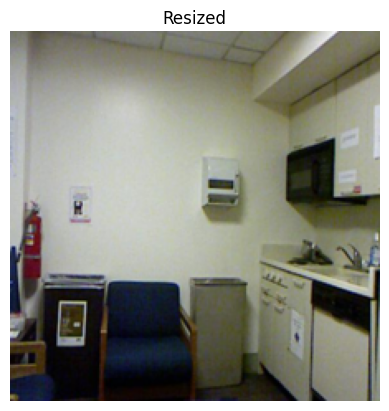

In [5]:
sample = Image.open(os.path.join(output_dir, os.listdir(output_dir)[0]))
plt.imshow(sample)
plt.title("Resized")
plt.axis('off')
plt.show()

In [6]:
def validate_images(directory):
    valid_images= []
    for img_file in tqdm(os.listdir(directory)):
        try:
            img = Image.open(os.path.join(directory, img_file))
            img.verify()
            valid_images.append(img_file)
        except:
            print(f"{img_file} is corrupted or unreadable")
    return valid_images

validate_images = validate_images(output_dir)
print(f"Valid images: {len(validate_images)}")

100%|██████████| 1449/1449 [00:00<00:00, 15954.66it/s]

Valid images: 1449


In [10]:
import pandas as pd
train_df = pd.read_csv('../data/data_train.csv')
train_df['image_path'] = train_df['image_id'].apply(lambda x : os.path.join(output_dir, x + '.jpg'))